/kaggle/input/four-shapes/shapes/circle
/kaggle/input/four-shapes/shapes/square
/kaggle/input/four-shapes/shapes/star


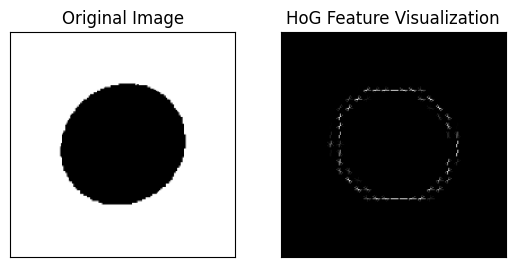

SVM HoG Prediction: [0]
Random Forest HoG Prediction: [0]
SVM HoG Accuracy: 1.0
Random Forest HoG Accuracy: 0.9966666666666667


In [1]:
import os
import cv2
import numpy as np
import random
from keras.utils import to_categorical  # Updated import
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/four-shapes/shapes"
CATEGORIES = ["circle", "square", "star"]
IMG_SIZE = 200
MAX_IMAGES_PER_CLASS = 500  # Limit the number of images per class

training = []

def TrainingData():
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(dataset_path, category)
        print(path)
        class_num = CATEGORIES.index(category)
        
        image_count = 0  # Keep track of the number of images collected for this class
        for img in os.listdir(path):
            if image_count >= MAX_IMAGES_PER_CLASS:
                break  # Stop collecting images once the limit is reached
            
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array, class_num])
            image_count += 1

# Call the TrainingData() function to process the dataset
TrainingData()

random.shuffle(training)

X = []
y = []
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

Y = to_categorical(y, 3)  # Use to_categorical from Keras

def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HoG features
    features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L2-Hys', transform_sqrt=True, visualize=True)
    
    # Resize HoG features to the same size as the input image (200x200)
    hog_resized = cv2.resize(hog_image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LINEAR)
    
    return hog_resized

X_hog = []
for image in X:
    temp = extract_hog_features(image)
    X_hog.append(temp)

# Now, X_hog contains HoG features

# Split the HoG feature data into training and testing sets
X_train_hog, X_test_hog, y_train_hog, y_test_hog = train_test_split(X_hog, y, test_size=0.2, random_state=3)

X_train_hog = np.array(X_train_hog)
X_test_hog = np.array(X_test_hog)
y_train_hog = np.array(y_train_hog)
y_test_hog = np.array(y_test_hog)

# Visualize the HoG features of an example image
plt.subplot(121), plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(X_test_hog[0], cmap='gray')
plt.title('HoG Feature Visualization'), plt.xticks([]), plt.yticks([])
plt.show()

# Flatten the HoG features
X_train_hog = X_train_hog.reshape((X_train_hog.shape[0], IMG_SIZE * IMG_SIZE))
X_test_hog = X_test_hog.reshape((X_test_hog.shape[0], IMG_SIZE * IMG_SIZE))

# Create SVM and Random Forest classifiers
svm_classifier_hog = SVC(kernel='linear', C=1.0)
rf_classifier_hog = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifiers
svm_classifier_hog.fit(X_train_hog, y_train_hog)
rf_classifier_hog.fit(X_train_hog, y_train_hog)

# Predict the class using SVM for HoG features
svm_prediction_hog = svm_classifier_hog.predict([X_test_hog[0]])

# Predict the class using Random Forest for HoG features
rf_prediction_hog = rf_classifier_hog.predict([X_test_hog[0]])

print("SVM HoG Prediction:", svm_prediction_hog)
print("Random Forest HoG Prediction:", rf_prediction_hog)

# Evaluate the accuracies for HoG features
svm_predictions_hog = svm_classifier_hog.predict(X_test_hog)
rf_predictions_hog = rf_classifier_hog.predict(X_test_hog)

svm_accuracy_hog = accuracy_score(y_test_hog, svm_predictions_hog)
rf_accuracy_hog = accuracy_score(y_test_hog, rf_predictions_hog)

print("SVM HoG Accuracy:", svm_accuracy_hog)
print("Random Forest HoG Accuracy:", rf_accuracy_hog)


# > **> SVM HoG Accuracy: 0.9966666666666667
# > > Random Forest HoG Accuracy: 0.9933333333333333

# LBP - SVM & RF 

/kaggle/input/four-shapes/shapes/circle
/kaggle/input/four-shapes/shapes/square
/kaggle/input/four-shapes/shapes/star


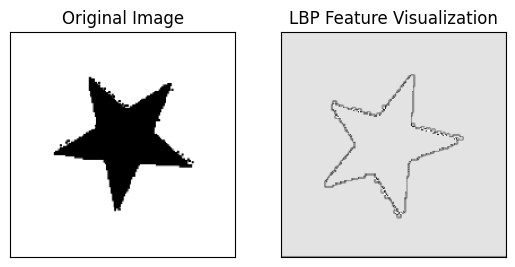

SVM LBP Prediction: [2]
Random Forest LBP Prediction: [2]
SVM LBP Accuracy: 0.9966666666666667
Random Forest LBP Accuracy: 0.9933333333333333


In [2]:
import os
import cv2
import numpy as np
import random
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/four-shapes/shapes"
CATEGORIES = ["circle", "square", "star"]
IMG_SIZE = 200
MAX_IMAGES_PER_CLASS = 500  # Limit the number of images per class

training = []

def TrainingData():
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(dataset_path, category)
        print(path)
        class_num = CATEGORIES.index(category)
        
        image_count = 0  # Keep track of the number of images collected for this class
        for img in os.listdir(path):
            if image_count >= MAX_IMAGES_PER_CLASS:
                break  # Stop collecting images once the limit is reached
            
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array, class_num])
            image_count += 1

# Call the TrainingData() function to process the dataset
TrainingData()

random.shuffle(training)

X = []
y = []
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

def extract_lbp_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract LBP features
    lbp_image = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    
    # Resize LBP features to the same size as the input image (200x200)
    lbp_resized = cv2.resize(lbp_image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LINEAR)
    
    return lbp_resized

X_lbp = []
for image in X:
    temp = extract_lbp_features(image)
    X_lbp.append(temp)

# Now, X_lbp contains LBP features

# Split the LBP feature data into training and testing sets
X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp = train_test_split(X_lbp, y, test_size=0.2, random_state=3)

X_train_lbp = np.array(X_train_lbp)
X_test_lbp = np.array(X_test_lbp)
y_train_lbp = np.array(y_train_lbp)
y_test_lbp = np.array(y_test_lbp)

# Visualize the LBP features of an example image
plt.subplot(121), plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(X_test_lbp[0], cmap='gray')
plt.title('LBP Feature Visualization'), plt.xticks([]), plt.yticks([])
plt.show()

# Flatten the LBP features
X_train_lbp = X_train_lbp.reshape((X_train_lbp.shape[0], IMG_SIZE * IMG_SIZE))
X_test_lbp = X_test_lbp.reshape((X_test_lbp.shape[0], IMG_SIZE * IMG_SIZE))

# Create SVM and Random Forest classifiers
svm_classifier_lbp = SVC(kernel='linear', C=1.0)
rf_classifier_lbp = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifiers
svm_classifier_lbp.fit(X_train_lbp, y_train_lbp)
rf_classifier_lbp.fit(X_train_lbp, y_train_lbp)

# Predict the class using SVM for LBP features
svm_prediction_lbp = svm_classifier_lbp.predict([X_test_lbp[0]])

# Predict the class using Random Forest for LBP features
rf_prediction_lbp = rf_classifier_lbp.predict([X_test_lbp[0]])

print("SVM LBP Prediction:", svm_prediction_lbp)
print("Random Forest LBP Prediction:", rf_prediction_lbp)

# Evaluate the accuracies for LBP features
svm_predictions_lbp = svm_classifier_lbp.predict(X_test_lbp)
rf_predictions_lbp = rf_classifier_lbp.predict(X_test_lbp)

svm_accuracy_lbp = accuracy_score(y_test_lbp, svm_predictions_lbp)
rf_accuracy_lbp = accuracy_score(y_test_lbp, rf_predictions_lbp)

print("SVM LBP Accuracy:", svm_accuracy_lbp)
print("Random Forest LBP Accuracy:", rf_accuracy_lbp)


**SVM LBP Accuracy: 1.0
Random Forest LBP Accuracy: 1.0******